In [76]:
# https://sites.google.com/site/ryunosukehm/study/ml-with-python/impact-ss2017/hmm_toy_example
# https://www.kabuku.co.jp/developers/hmm
# http://keik-117.hatenablog.com/entry/2016/07/05/213903
%load_ext autoreload
%autoreload 2

import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
from data_helper import *
from music_helper import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
# https://hmmlearn.readthedocs.io/en/latest/api.html#hmmlearn-hmm
# 隠れた状態は指番号 観測できるのは音符列
components = (5 * 5) * 2 # (1->1, 1->2, ..., 5->4, 5->5) * (上行, 下行)
model = hmm.GaussianHMM(n_components=components, covariance_type="diag")

model.startprob_ = np.ones(components) / components

t = np.array([
    np.array(([0]*0) +[0.00, 0.25, 0.25, 0.25, 0.25]+([0]*20) + ([0]*0)+[0.00, 0.50, 0.40, 0.10, 0.00] +([0]*20)) / 2,
    np.array(([0]*5) +[0.10, 0.00, 0.30, 0.30, 0.30]+([0]*15) + ([0]*5)+[0.90, 0.00, 0.05, 0.05, 0.00] +([0]*15)) / 2,
    np.array(([0]*10)+[0.10, 0.05, 0.00, 0.50, 0.35]+([0]*10) + ([0]*10)+[0.40, 0.55, 0.00, 0.05, 0.00]+([0]*10)) / 2,
    np.array(([0]*15)+[0.10, 0.05, 0.05, 0.00, 0.80]+([0]*5)  + ([0]*15)+[0.25, 0.25, 0.50, 0.00, 0.00]+([0]*5)) / 2,
    np.array(([0]*20)+[0.20, 0.20, 0.20, 0.20, 0.20]+([0]*0)  + ([0]*20)+[0.20, 0.15, 0.25, 0.40, 0.00]+([0]*0)) / 2,
])
model.transmat_ = np.tile(t, (5 * 2, 1))
# ノードの出力
model.means_ = np.array([
    # 0 上行 1指 -> 
    [0],[1],[2],[3],[4],
    # 上行 2指 -> 
    [1],[0],[1],[2],[3],
    # 上行 3指 ->
    [1],[1],[0],[1],[2],
    # 上行 4指 -> 
    [1],[1],[1],[0],[1],
    # 上行 5指 -> 
    [5],[5],[5],[5],[5],
    # 25 下行 1指 -> 
    [0],[-1],[-1],[-1],[-1],
    
    [-1],[0],[-1],[-1],[-1],
    
    [-2],[-1],[0],[-1],[-1],
    
    [-3],[-2],[-1],[0],[-1],

    [-4],[-3],[-2],[-1],[0],
])
sigma = 1
covars = np.ones((components, 1)) * sigma
model.covars_ = covars

In [79]:
X, Z = model.sample(10)
Z % 5 + 1

array([3, 4, 5, 5, 4, 3, 1, 2, 1, 3], dtype=int32)

"C:\Users\puris\Tools\MuseScorePortable\MuseScorePortable.exe" "C:\Users\puris\AppData\Local\Temp\music21\tmpcajludos.xml" -o "C:\Users\puris\AppData\Local\Temp\music21\tmpcajludos.png" -T 0  -r 200


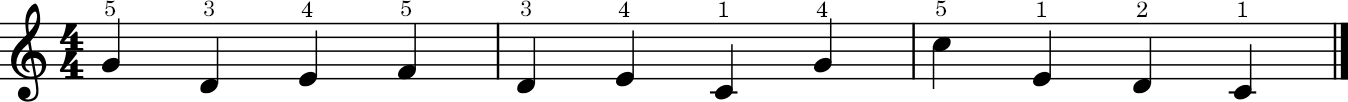

In [80]:
def to_inputs(notes):
    outputs = [0] * len(notes)
    for i in range(len(notes) - 1):
        outputs[i + 1] = note_pos(notes[i + 1]) - note_pos(notes[i])
    return outputs
# 入力
stream = mu.converter.parse('./mxl/note_example1.xml')
notes = stream.flat.notes
inputs = to_inputs(notes)
# 予測
fingers = model.predict(np.array(inputs).reshape(len(inputs), 1)) % 5 + 1
# 楽譜化
s = mu.stream.Stream()
for n in notes:
    s.append(mu.note.Note(n.nameWithOctave, quarterLength=n.quarterLength))
for i in range(len(notes)):
    s[i].articulations.append(mu.articulations.Fingering(fingers[i]))
s.show()

"C:\Users\puris\Tools\MuseScorePortable\MuseScorePortable.exe" "C:\Users\puris\AppData\Local\Temp\music21\tmpff07nuvy.xml" -o "C:\Users\puris\AppData\Local\Temp\music21\tmpff07nuvy.png" -T 0  -r 200


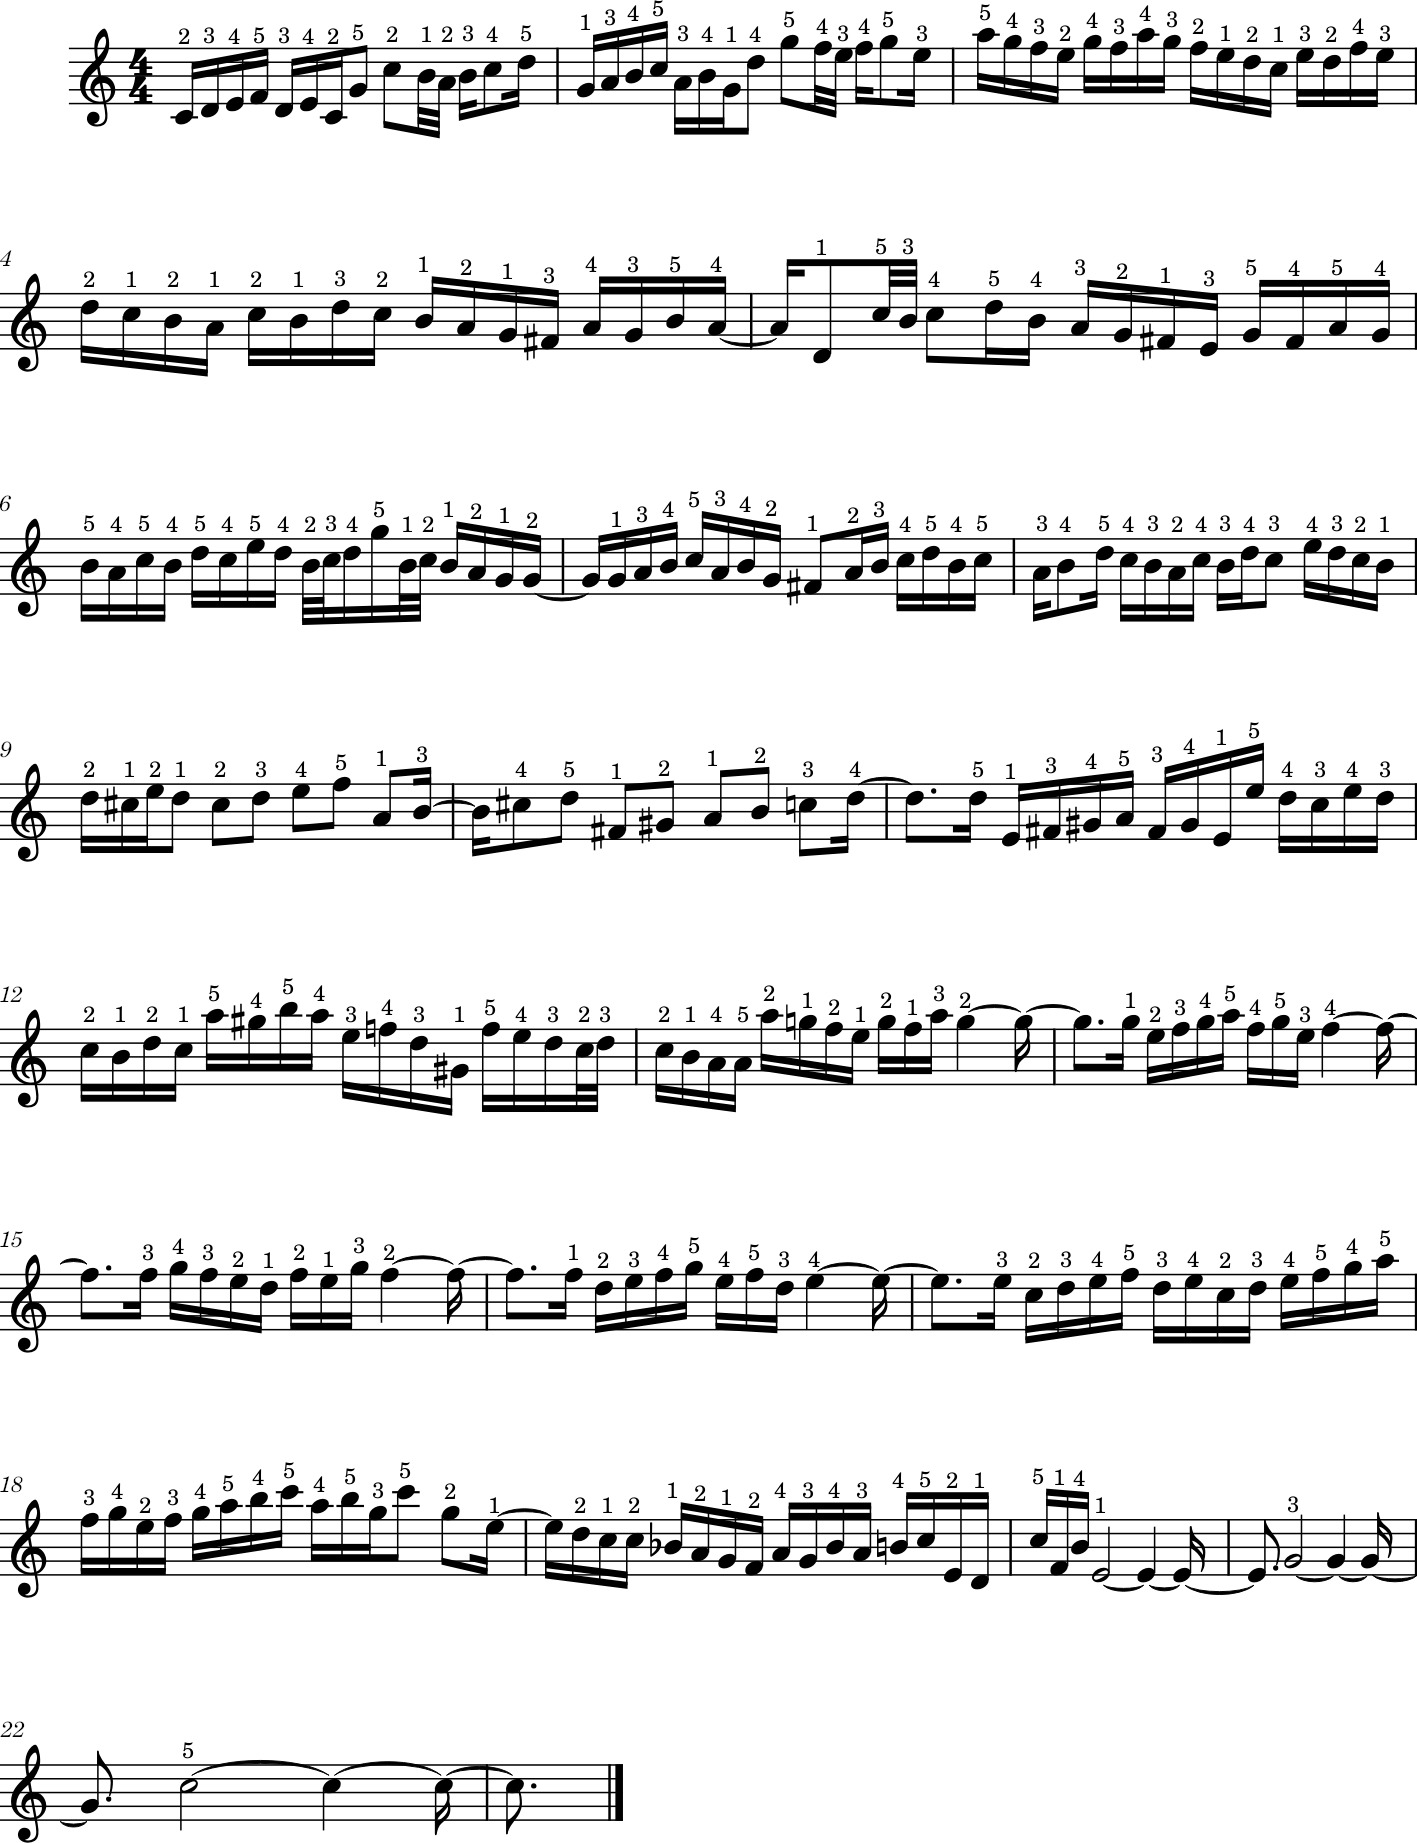

In [81]:
# 入力
stream = mu.converter.parse('./tmp/Invention_no1.xml')
notes = stream.parts[0].flat.notes
inputs = to_inputs(notes)
# 予測
fingers = model.predict(np.array(inputs).reshape(len(inputs), 1)) % 5 + 1
# 楽譜化
s = mu.stream.Stream()
for n in notes:
    s.append(mu.note.Note(n.nameWithOctave, quarterLength=n.quarterLength))
for i in range(len(notes)):
    s[i].articulations.append(mu.articulations.Fingering(fingers[i]))
s.show()

In [ ]:
# Automatic Determination of Piano Fingering based on Hidden Markov Model
components = 5 * 5
# https://hmmlearn.readthedocs.io/en/latest/api.html#hmmlearn.hmm.GMMHMM
model = hmm.GMMHMM(n_components=components, n_mix=2, algorithm='viterbi', covariance_type='diag')
hmm._check_and_set_gaussian_n_features(model, np.zeros(shape = (0, 2)))

model.startprob_ = np.ones(components) / components

t = np.array([
    np.array(([0]*0) +[0.20, 0.20, 0.20, 0.20, 0.20]+([0]*20)),
    np.array(([0]*5) +[0.20, 0.20, 0.20, 0.20, 0.20]+([0]*15)),
    np.array(([0]*10)+[0.21, 0.21, 0.21, 0.16, 0.21]+([0]*10)),
    np.array(([0]*15)+[0.23, 0.23, 0.16, 0.22, 0.16]+([0]*5)),
    np.array(([0]*20)+[0.21, 0.21, 0.21, 0.16, 0.21]+([0]*0)),
])
model.transmat_ = np.tile(t, (5, 1))

# ノードの出力　２次元混合ガウス分布
model.weights_ = np.array([
    # 1->1, 1->2, 1->3, 1->4, 1->5, 2->1, 2->2, 2->3, 2->4, 2->5, ...
#    [1.00, 0.00], [1.00, 0.00], [1.00, 0.00], [1.00, 0.00], [1.00, 0.00],  
    [1.00, 0.00], [0.81, 0.19], [0.89, 0.11], [0.91, 0.09], [0.95, 0.05], 
    [0.81, 0.19], [1.00, 0.00], [1.00, 0.00], [1.00, 0.00], [1.00, 0.00], 
    [0.89, 0.11], [1.00, 0.00], [1.00, 0.00], [1.00, 0.00], [1.00, 0.00], 
    [0.91, 0.09], [1.00, 0.00], [1.00, 0.00], [1.00, 0.00], [1.00, 0.00], 
    [0.95, 0.05], [1.00, 0.00], [1.00, 0.00], [1.00, 0.00], [1.00, 0.00], 
])
model.means_ = np.array([
    [[0, 0], [0, 0]],        [[42, 25], [-23, 25]], [[50, 30], [-16, 30]], [[85, 25], [-16, 25]], [[110, 0], [-21, 0]], 
    [[-42, -25], [23, -25]], [[0, 0], [0, 0]],      [[23, 10], [0, 0]],    [[50, 0], [0, 0]],     [[82, -25], [0, 0]],   
    [[-50, -30], [16, -30]], [[-23, 10], [0, 0]],   [[0, 0], [0, 0]],      [[18, -10], [0, 0]],   [[57, -25], [0, 0]], 
    [[-85, -25], [16, -25]], [[-50, 0], [0, 0]],    [[-18, 10], [0, 0]],   [[0, 0], [0, 0]],      [[20, -20], [0, 0]],   
    [[-110, -0], [21, -0]],  [[-82, 25], [0, 0]],   [[-57, 25], [0, 0]],   [[-20, 20], [0, 0]],   [[0, 0], [0, 0]], 
])
model.covars_ = np.array([
    [[5, 30], [0, 0]],      [[900, 30], [400, 30]], [[900, 30], [100, 30]], [[900, 30], [100, 30]], [[900, 30], [400, 30]], 
    [[900, 30], [400, 30]], [[5, 30], [0, 0]],      [[180, 30], [0, 0]],    [[200, 30], [0, 0]],    [[200, 30], [0, 0]], 
    [[900, 30], [100, 30]], [[180, 30], [0, 0]],    [[5, 30], [0, 0]],      [[190, 30], [0, 0]],    [[250, 30], [0, 0]], 
    [[900, 30], [100, 30]], [[200, 30], [0, 0]],    [[190, 30], [0, 0]],    [[5, 30], [0, 0]],      [[200, 30], [0, 0]], 
    [[900, 30], [400, 30]], [[200, 30], [0, 0]],    [[250, 30], [0, 0]],    [[200, 30], [0, 0]],    [[5, 30], [0, 0]], 
])

In [ ]:
X, Z = model.sample(10)
Z % 5 + 1

In [ ]:
def to_inputs(notes):
    outputs = np.zeros(shape = (len(notes), 2))
    for i in range(len(notes) - 1):
        outputs[i + 1] = np.array(note_pos2(notes[i + 1])) - np.array(note_pos2(notes[i]))
    return outputs * 23
# 入力
stream = mu.converter.parse('./mxl/note_example1.xml')
notes = stream.flat.notes
inputs = to_inputs(notes)
# 予測
fingers = model.predict(inputs)
# 楽譜化
s = mu.stream.Stream()
for n in notes:
    s.append(mu.note.Note(n.nameWithOctave, quarterLength=n.quarterLength))
for i in range(len(notes)):
    s[i].articulations.append(mu.articulations.Fingering(f"{int(fingers[i] / 5) + 1} {fingers[i] % 5 + 1}"))
s.show()